In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df=pd.read_excel(r"D:\Harsh\Madhura Ma'am\Cleaning\Cleaned_all_yrs.xlsx")
df

,Latitude,Longitude,Tur (NTU),Ph,EC,TDS (mg-L),Alkalinity (mg-L),Chloride (mg-L),Fluoride (mg-L),Nitrate (mg-L),Sulphate (mg-L),Total Hardness (mg-L),Iron (mg-L),Remark,Monsoon
0,18.136968,74.462032,35.30,7.78,456.923077,297.0,20.0,148.46,0.000,1.890,5.528,117.6,0.300,0,1
1,18.136968,74.462032,5.96,7.59,375.384615,244.0,20.0,39.59,0.237,1.529,3.864,151.2,0.290,0,1
2,18.136968,74.462032,33.90,8.02,553.846154,360.0,20.0,178.12,0.000,1.841,6.013,117.6,0.415,0,1
3,18.136968,74.462032,22.70,7.78,969.230769,630.0,250.0,138.56,0.995,1.813,5.528,134.4,0.300,0,1
4,18.136968,74.462032,36.00,8.02,423.076923,275.0,30.0,118.77,0.058,1.833,2.986,117.6,0.300,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53054,18.520430,73.856744,0.44,8.40,241.538462,157.0,20.0,29.67,0.694,1.852,0.000,47.5,0.000,1,1
53055,18.520430,73.856744,0.58,8.44,246.153846,160.0,20.0,19.78,0.696,2.957,6.136,85.5,0.512,1,1
53056,18.520430,73.856744,0.58,8.32,1076.923077,700.0,160.0,89.01,0.000,4.696,13.812,180.5,0.241,1,1
53057,18.520430,73.856744,0.36,8.24,546.153846,355.0,20.0,49.45,0.924,1.848,0.000,104.5,0.000,1,1


In [3]:
df.columns

Index(['Latitude', 'Longitude', 'Tur (NTU)', 'Ph', 'EC', 'TDS (mg-L)',
       'Alkalinity (mg-L)', 'Chloride (mg-L)', 'Fluoride (mg-L)',
       'Nitrate (mg-L)', 'Sulphate (mg-L)', 'Total Hardness (mg-L)',
       'Iron (mg-L)', 'Remark', 'Monsoon'],
      dtype='object')

In [4]:
a=['Latitude', 'Longitude']
df.drop(a,axis=1,inplace=True)

In [5]:
X=df.drop(columns=["Remark"])
X.shape

(53059, 12)

In [6]:
Y=df['Remark']
Y.shape

(53059,)

In [7]:
Y=np.array(Y).reshape(-1,1)
Y.shape

(53059, 1)

In [8]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=12)

In [9]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(42447, 12)
(42447, 1)
(10612, 12)
(10612, 1)


In [10]:
model=Sequential()

In [11]:
model.add(Dense(16,input_shape=(12,),activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,977
Trainable params: 4,977
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["Accuracy"])

In [14]:
cache=model.fit(Xtrain,Ytrain,batch_size=10,epochs=150,validation_split=0.2)

Epoch 1/150
3396/3396 [==============================] - 7s 2ms/step - loss: 0.5781 - Accuracy: 0.8032 - val_loss: 0.4255 - val_Accuracy: 0.8438
Epoch 2/150
3396/3396 [==============================] - 6s 2ms/step - loss: 0.3430 - Accuracy: 0.8709 - val_loss: 0.3012 - val_Accuracy: 0.8835
Epoch 3/150
3396/3396 [==============================] - 6s 2ms/step - loss: 0.2918 - Accuracy: 0.8937 - val_loss: 0.2599 - val_Accuracy: 0.8999
Epoch 4/150
3396/3396 [==============================] - 6s 2ms/step - loss: 0.2680 - Accuracy: 0.9014 - val_loss: 0.2468 - val_Accuracy: 0.9144
Epoch 5/150
3396/3396 [==============================] - 6s 2ms/step - loss: 0.2553 - Accuracy: 0.9065 - val_loss: 0.2508 - val_Accuracy: 0.9024
Epoch 6/150
3396/3396 [==============================] - 5s 1ms/step - loss: 0.2469 - Accuracy: 0.9106 - val_loss: 0.2587 - val_Accuracy: 0.9074
Epoch 7/150
3396/3396 [==============================] - 5s 2ms/step - loss: 0.2451 - Accuracy: 0.9115 - val_loss: 0.2278 - val_Ac

3396/3396 [==============================] - 5s 1ms/step - loss: 0.1466 - Accuracy: 0.9457 - val_loss: 0.1192 - val_Accuracy: 0.9536
Epoch 58/150
3396/3396 [==============================] - 5s 1ms/step - loss: 0.1501 - Accuracy: 0.9452 - val_loss: 0.1665 - val_Accuracy: 0.9406
Epoch 59/150
3396/3396 [==============================] - 5s 1ms/step - loss: 0.1474 - Accuracy: 0.9468 - val_loss: 0.1252 - val_Accuracy: 0.9499
Epoch 60/150
3396/3396 [==============================] - 5s 1ms/step - loss: 0.1440 - Accuracy: 0.9473 - val_loss: 0.1277 - val_Accuracy: 0.9491
Epoch 61/150
3396/3396 [==============================] - 5s 1ms/step - loss: 0.1402 - Accuracy: 0.9474 - val_loss: 0.1322 - val_Accuracy: 0.9485
Epoch 62/150
3396/3396 [==============================] - 5s 1ms/step - loss: 0.1409 - Accuracy: 0.9473 - val_loss: 0.1470 - val_Accuracy: 0.9433
Epoch 63/150
3396/3396 [==============================] - 5s 1ms/step - loss: 0.1457 - Accuracy: 0.9456 - val_loss: 0.1325 - val_Accuracy

3396/3396 [==============================] - 5s 1ms/step - loss: 0.1257 - Accuracy: 0.9536 - val_loss: 0.1055 - val_Accuracy: 0.9596
Epoch 114/150
3396/3396 [==============================] - 5s 1ms/step - loss: 0.1239 - Accuracy: 0.9545 - val_loss: 0.0985 - val_Accuracy: 0.9618
Epoch 115/150
3396/3396 [==============================] - 5s 2ms/step - loss: 0.1243 - Accuracy: 0.9536 - val_loss: 0.0997 - val_Accuracy: 0.9650
Epoch 116/150
3396/3396 [==============================] - 5s 1ms/step - loss: 0.1395 - Accuracy: 0.9494 - val_loss: 0.1586 - val_Accuracy: 0.9372
Epoch 117/150
3396/3396 [==============================] - 5s 1ms/step - loss: 0.1234 - Accuracy: 0.9555 - val_loss: 0.1164 - val_Accuracy: 0.9550
Epoch 118/150
3396/3396 [==============================] - 5s 1ms/step - loss: 0.1227 - Accuracy: 0.9544 - val_loss: 0.0972 - val_Accuracy: 0.9667
Epoch 119/150
3396/3396 [==============================] - 5s 1ms/step - loss: 0.1229 - Accuracy: 0.9551 - val_loss: 0.0977 - val_Ac

In [15]:
model.evaluate(Xtrain,Ytrain)

1327/1327 [==============================] - 2s 1ms/step - loss: 0.1003 - Accuracy: 0.9620


[0.10030287504196167, 0.9619525671005249]

In [16]:
model.evaluate(Xtest,Ytest)

332/332 [==============================] - 0s 1ms/step - loss: 0.1076 - Accuracy: 0.9609


[0.10757914185523987, 0.9608933329582214]

In [17]:
pred=model.predict(Xtest)

332/332 [==============================] - 1s 1ms/step


In [18]:
pred

array([[6.9726247e-01],
       [9.7830151e-04],
       [4.2190880e-02],
       ...,
       [9.9505663e-01],
       [9.9536884e-01],
       [3.7866663e-02]], dtype=float32)

In [19]:
predi=[]
for i in pred:
    if(i>0.5):
        predi.append(1)
    else:
        predi.append(0)

In [20]:
predictions=pd.DataFrame({"Actual":Ytest.flatten(),"Pred":predi})
predictions

,Actual,Pred
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
10607,1,1
10608,1,1
10609,1,1
10610,1,1


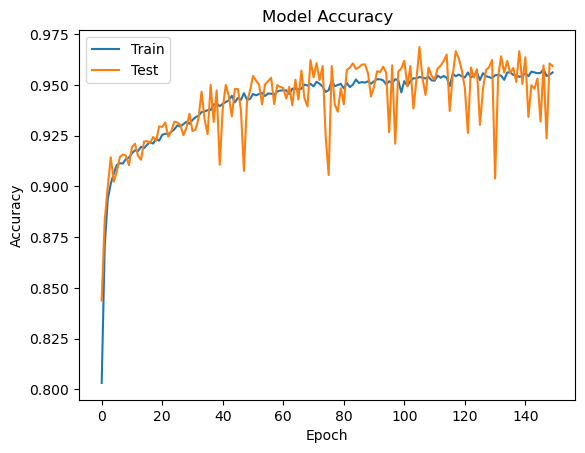

In [21]:
plt.plot(cache.history["Accuracy"])
plt.plot(cache.history["val_Accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

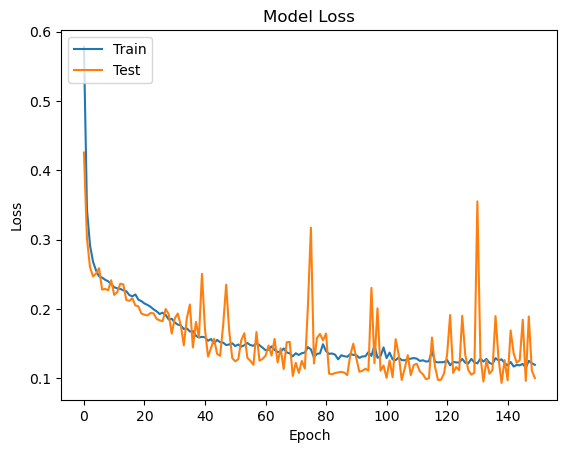

In [22]:
plt.plot(cache.history["loss"])
plt.plot(cache.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

In [23]:
model.save(r"D:\Harsh\Madhura Ma'am\GWQ.h5")

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
matrix=confusion_matrix(Ytest,predi)
matrix

array([[1791,  299],
       [ 116, 8406]], dtype=int64)

<AxesSubplot: >

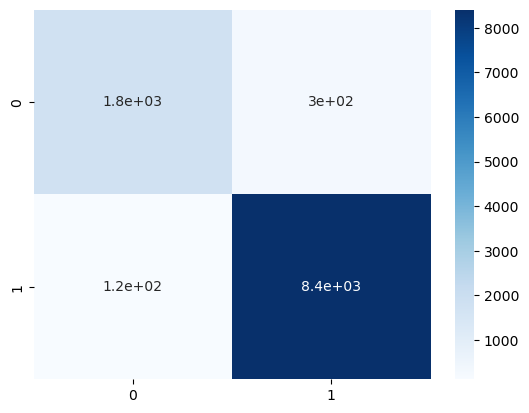

In [25]:
import seaborn as sns
sns.heatmap(matrix, cmap="Blues", annot=True)

In [26]:
print(classification_report(Ytest,predi))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2090
           1       0.97      0.99      0.98      8522

    accuracy                           0.96     10612
   macro avg       0.95      0.92      0.94     10612
weighted avg       0.96      0.96      0.96     10612



In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model1=LogisticRegression().fit(Xtrain,Ytrain)

C:\Users\harsh\anaconda3\envs\advpy\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\harsh\anaconda3\envs\advpy\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print(model1.intercept_)
print(model1.coef_)

[0.06103984]
[[-0.05032538  0.35343439 -0.00202071  0.0032263  -0.00301592 -0.00214886
  -0.03511767 -0.03233997 -0.00289695  0.00068579  0.00120445  0.06018183]]


In [30]:
model1.predict_proba(Xtest)

array([[0.31159095, 0.68840905],
       [0.04993239, 0.95006761],
       [0.52773537, 0.47226463],
       ...,
       [0.13328925, 0.86671075],
       [0.18988201, 0.81011799],
       [0.68214507, 0.31785493]])

In [31]:
y_pred=model1.predict(Xtest)

In [32]:
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [33]:
model1.score(Xtest,Ytest)

0.8573313230305315

In [34]:
matrix1=confusion_matrix(Ytest,y_pred)
matrix1

array([[ 639, 1451],
       [  63, 8459]], dtype=int64)

<AxesSubplot: >

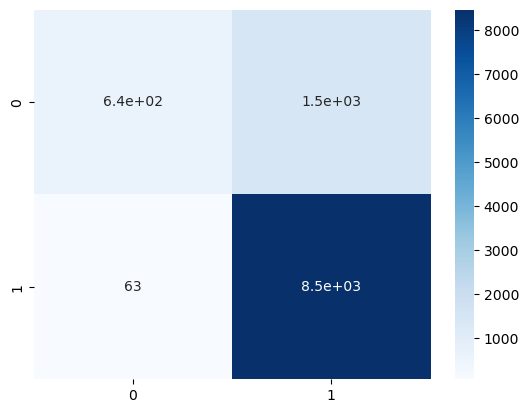

In [35]:
import seaborn as sns
sns.heatmap(matrix1, cmap="Blues", annot=True)

In [36]:
print(classification_report(Ytest,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.31      0.46      2090
           1       0.85      0.99      0.92      8522

    accuracy                           0.86     10612
   macro avg       0.88      0.65      0.69     10612
weighted avg       0.86      0.86      0.83     10612



In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Create the Random Forest Classifier
model2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model2.fit(Xtrain, Ytrain)

C:\Users\harsh\AppData\Local\Temp\ipykernel_20256\3190147769.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(Xtrain, Ytrain)


RandomForestClassifier(random_state=42)

In [38]:
model2.score(Xtest,Ytest)

0.9981153411232567

In [39]:
y_pred2=model2.predict(Xtest)

In [40]:
y_pred2

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [41]:
matrix2=confusion_matrix(Ytest,y_pred2)
matrix2

array([[2074,   16],
       [   4, 8518]], dtype=int64)

<AxesSubplot: >

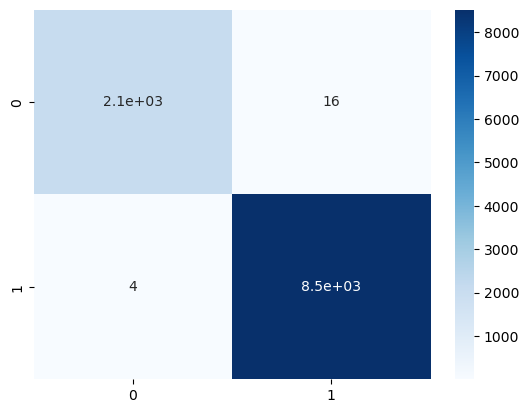

In [42]:
import seaborn as sns
sns.heatmap(matrix2, cmap="Blues", annot=True)

In [43]:
print(classification_report(Ytest,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2090
           1       1.00      1.00      1.00      8522

    accuracy                           1.00     10612
   macro avg       1.00      1.00      1.00     10612
weighted avg       1.00      1.00      1.00     10612



In [44]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the XGBoost Classifier
model3 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
model3.fit(Xtrain, Ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [45]:
model3.score(Xtest,Ytest)

0.9952883528081418

In [46]:
y_pred3=model3.predict(Xtest)

In [47]:
y_pred3

array([1, 0, 0, ..., 1, 1, 0])

In [48]:
matrix3=confusion_matrix(Ytest,y_pred3)
matrix3

array([[2056,   34],
       [  16, 8506]], dtype=int64)

<AxesSubplot: >

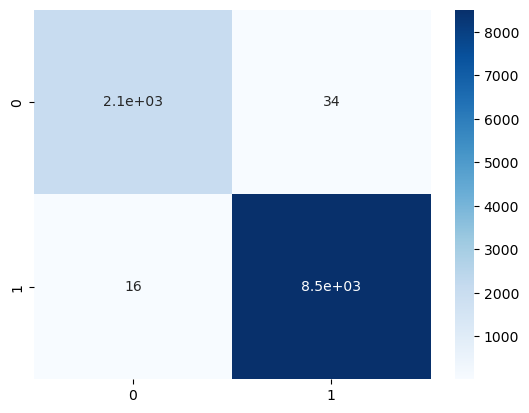

In [49]:
import seaborn as sns
sns.heatmap(matrix3, cmap="Blues", annot=True)

In [50]:
print(classification_report(Ytest,y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2090
           1       1.00      1.00      1.00      8522

    accuracy                           1.00     10612
   macro avg       0.99      0.99      0.99     10612
weighted avg       1.00      1.00      1.00     10612



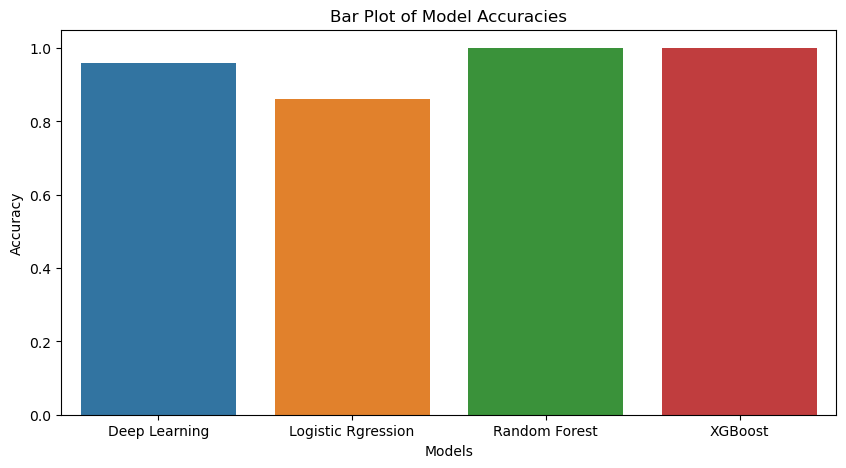

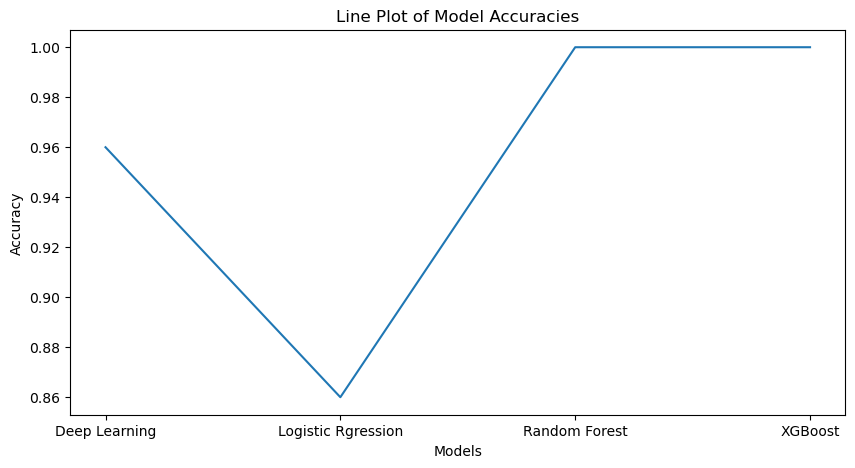

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a dictionary of models and their accuracies
accuracies = {
    'Deep Learning': 0.96,
    'Logistic Rgression':0.86,
    'Random Forest': 1.00,
    'XGBoost': 1.00
}

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Bar Plot of Model Accuracies')
plt.show()

# Create a line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=list(accuracies.keys()), y=list(accuracies.values()), sort=False)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Line Plot of Model Accuracies')
plt.show()

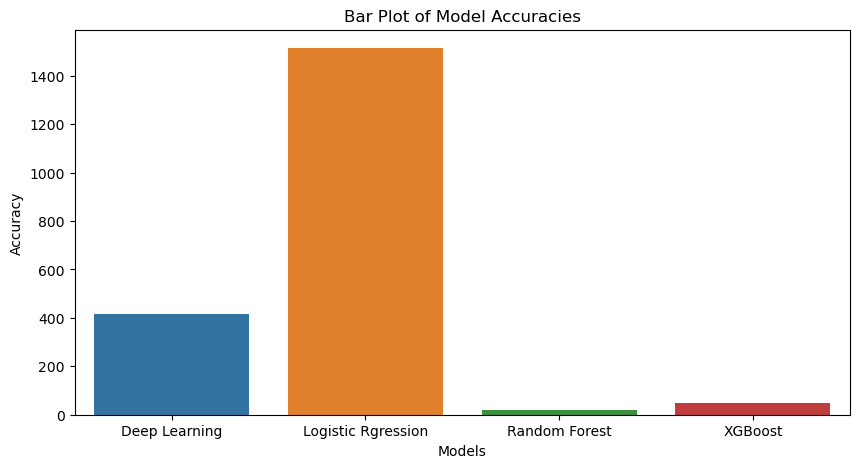

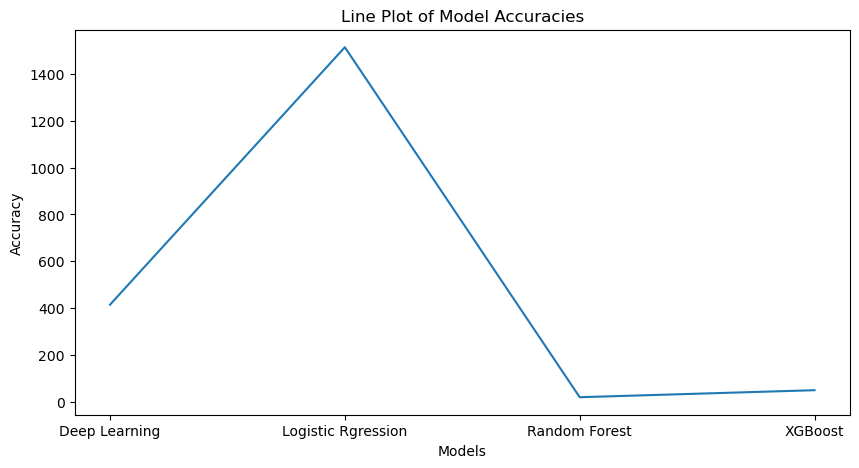

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a dictionary of models and their accuracies
wrong_predictions = {
    'Deep Learning': 415,
    'Logistic Rgression':1514,
    'Random Forest': 20,
    'XGBoost': 50
}

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=list(wrong_predictions.keys()), y=list(wrong_predictions.values()))
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Bar Plot of Model Accuracies')
plt.show()

# Create a line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=list(wrong_predictions.keys()), y=list(wrong_predictions.values()), sort=False)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Line Plot of Model Accuracies')
plt.show()